# Regroupement avec k-moyennes
Démêlez les relations spatiales complexes à l’aide d’étiquettes de cluster.


### Introduction  
Cette leçon (et la suivante) se concentre sur **les algorithmes d'apprentissage non supervisé**. `Contrairement aux "algorithmes supervisés", ceux-ci ne nécessitent pas de variable cible`. Leur objectif est d'apprendre une propriété des données, permettant de représenter la structure des caractéristiques d'une certaine manière.  
Dans le cadre de **l'ingénierie des caractéristiques** (feature engineering) pour la prédiction, les algorithmes non supervisés peuvent être considérés comme des techniques de "découverte de caractéristiques".  

#### Clustering (regroupement)  
Le clustering consiste à assigner des points de données à des groupes (ou clusters) en fonction de leur similarité. En d'autres termes, c'est une manière de regrouper "**les oiseaux de même plumage**".  

**Exemple en feature engineering :**
- Découvrir des groupes de clients qui représentent des segments de marché.
- Identifier des zones géographiques partageant des schémas météorologiques similaires.  

L'ajout d'une **caractéristique de type "étiquette de cluster"** peut aider les modèles d'apprentissage automatique à démêler des relations complexes d'espace ou de proximité.  

---

### Étiquettes de clusters comme caractéristiques  
Lorsque le clustering est appliqué à une seule variable numérique, il agit comme une "discrétisation" ou un "binning" traditionnel (groupement en intervalles).  
Pour plusieurs caractéristiques, le clustering peut être vu comme un "binning multidimensionnel" (aussi appelé quantification vectorielle).

#### Exemple  
Ajoutons une colonne représentant les étiquettes de cluster dans un dataframe :  

| Longitude | Latitude | Cluster |
|-----------|----------|---------|
| -93.619   | 42.054   | 3       |
| -93.619   | 42.053   | 3       |
| -93.638   | 42.060   | 1       |
| -93.602   | 41.988   | 0       |

Cette **caractéristique "Cluster" est catégorique**. Dans cet exemple, elle est encodée avec des nombres entiers (comme le ferait un algorithme de clustering). Selon le modèle, un **encodage one-hot** pourrait être plus adapté.  

L'idée principale d'ajouter des étiquettes de clusters est de **diviser des relations complexes en sous-ensembles plus simples**. Cela permet au modèle d'apprendre ces relations plus facilement, en adoptant une stratégie de type "diviser pour mieux régner".  

#### Exemple visuel  
En divisant la relation entre l'année de construction (**YearBuilt**) et le prix de vente (**SalePrice**) en clusters, un modèle linéaire simple peut mieux apprendre la relation, car elle devient presque linéaire dans chaque sous-groupe.

---

### Clustering avec l'algorithme k-moyennes (k-means)  
Il existe de nombreux algorithmes de clustering, qui diffèrent par leur manière de mesurer la similarité et les types de caractéristiques qu'ils traitent. Le **k-means** est intuitif et facile à appliquer dans le cadre du feature engineering.

#### Fonctionnement :  
1. Le k-means mesure la **similarité en utilisant la distance Euclidienne** (distance en ligne droite).  
2. Il crée des clusters en plaçant des **centroïdes** dans l'espace des caractéristiques. Chaque point du jeu de données est assigné au cluster du centroïde le plus proche.  
3. **Paramètre "k"** : Le nombre de clusters est défini par l'utilisateur.  

Les centroïdes capturent les points proches dans une zone définie. Lorsqu'il y a chevauchement entre les zones des centroïdes, cela forme une ligne appelée **tessellation de Voronoï**, qui montre à quels clusters les futurs points seront assignés.

---

### Algorithme k-means (schéma général)  
L'algorithme suit ces étapes :  
1. **Initialisation** : Positionner aléatoirement un nombre prédéfini de centroïdes (**n_clusters**).  
2. Répéter les opérations suivantes :  
   - Assigner chaque point au centroïde le plus proche.  
   - Déplacer chaque centroïde pour minimiser la distance avec les points assignés.  
3. Arrêter l'algorithme lorsque les centroïdes ne bougent plus ou qu'un maximum d'itérations (**max_iter**) est atteint.

Pour éviter un mauvais regroupement dû à une mauvaise initialisation, l'algorithme effectue plusieurs essais (**n_init**) et conserve le meilleur regroupement.  

---

### Exemple - Données de logement en Californie  
Les caractéristiques spatiales, comme la latitude et la longitude, se prêtent naturellement au clustering. Dans cet exemple, on combine **Latitude**, **Longitude** et **MedInc** (revenu médian) pour créer des segments économiques par région.  


In [10]:
import matplotlib.pyplot as plt

print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv("housing.csv")
X = df.loc[:, ["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


**Création des clusters**

In [15]:
# Création des clusters
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")
X.head()

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,3
1,8.3014,37.86,-122.22,3
2,7.2574,37.85,-122.24,3
3,5.6431,37.85,-122.25,1
4,3.8462,37.85,-122.25,1


---
### Regardons maintenant quelques graphiques pour évaluer l'efficacité du clustering.

- **Premier graphique** :
Un diagramme de dispersion montre la répartition géographique des clusters. Il semble que l'algorithme ait créé des segments distincts pour les zones à revenu élevé situées sur les côtes.


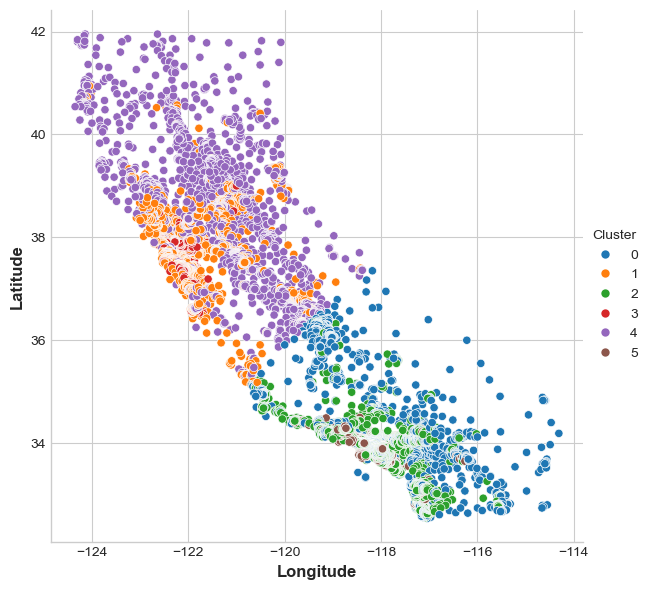

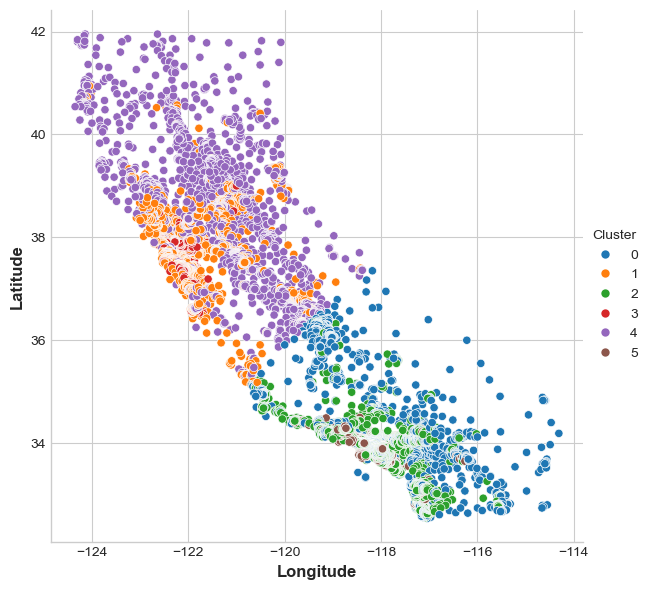

In [21]:
sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=X, height=6,
)
plt.show()

**Deuxième graphique** :
La cible dans ce dataset est *MedHouseVal* (valeur médiane des maisons).
Les diagrammes en boîte (box-plots) montrent la distribution de la cible dans chaque cluster. Si le clustering est informatif, ces distributions devraient, pour la plupart, être distinctes en fonction de MedHouseVal. Et c’est effectivement ce que l’on observe.

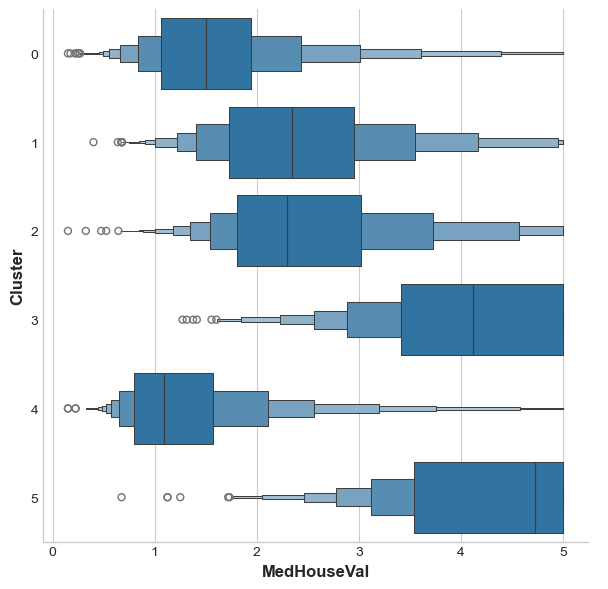

In [25]:
X["MedHouseVal"] = df["MedHouseVal"]
sns.catplot(x="MedHouseVal", y="Cluster", data=X, kind="boxen", height=6);
plt.show()

---
# Exercice : 
Dans cet exercice, vous allez explorer notre première technique **d'apprentissage non supervisé** pour créer des caractéristiques : le regroupement par **k-means**.

Exécutez cette cellule pour tout configurer !

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

# Paramètres par défaut pour Matplotlib
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def score_dataset(X, y, model=XGBRegressor()):
    # Encodage des catégories
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # La métrique pour la compétition Housing est RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score


# Préparation des données
df = pd.read_csv("ames.csv")

L'algorithme k-means est sensible à l'échelle des données. Cela signifie que nous devons réfléchir à la manière dont nous redimensionnons (ou non) nos caractéristiques, car les résultats peuvent varier selon nos choix. En règle générale :

- Si les caractéristiques sont directement comparables (comme des résultats de test à différents moments), il ne faut pas les redimensionner.
- Par contre, si les caractéristiques ne sont pas sur des échelles comparables (comme la taille et le poids), il est généralement utile de les redimensionner.

Parfois, le choix ne sera pas évident. Dans ce cas, essayez de faire preuve de bon sens, en gardant à l'esprit que les caractéristiques avec de grandes valeurs auront plus de poids.

---

### Question 1 : Mise à l'échelle des caractéristiques

Considérez les ensembles de caractéristiques suivants. Pour chacun, décidez s'ils :  
- **devraient définitivement être mis à l'échelle**,  
- **ne devraient définitivement pas être mis à l'échelle**, ou  
- **les deux choix pourraient être raisonnables**.  

Caractéristiques :  
1. Latitude et longitude des villes de Californie  
2. Superficie du terrain et surface habitable des maisons à Ames, Iowa  
3. Nombre de portes et puissance (en chevaux) d'une voiture modèle 1989  

Une fois que vous avez réfléchi à vos réponses, exécutez la cellule ci-dessous pour une discussion.  

```python
# Voir la solution (exécutez cette cellule pour obtenir du crédit !)
q_1.check()
```

---

**Correction :**

1. **Non**, car la mise à l'échelle déformerait les distances naturelles décrites par la latitude et la longitude.  
2. **Les deux choix pourraient être raisonnables**, mais comme la surface habitable d'une maison a tendance à être plus précieuse par pied carré, il serait logique de redimensionner ces caractéristiques pour que la superficie du terrain ne soit pas pondérée de manière disproportionnée dans le regroupement par rapport à son effet sur le prix de vente (si c'est ce que vous essayez de prédire).  
3. **Oui**, car ces caractéristiques n'ont pas d'unités comparables. Sans mise à l'échelle, le nombre de portes d'une voiture (généralement 2 ou 4) aurait un poids négligeable par rapport à sa puissance (généralement dans les centaines).

---

Ce que vous devez retenir ici, c'est que la décision de mettre ou non à l'échelle les caractéristiques n'est **rarement automatique**. Elle dépend généralement d'une connaissance du domaine à propos de vos données et de ce que vous essayez de prédire. Comparer différentes méthodes de mise à l'échelle via une validation croisée peut également être utile. (Vous pourriez aimer consulter le module de prétraitement de **scikit-learn** pour découvrir certaines des méthodes de mise à l'échelle qu'il propose.)

---

### Question 2 : créer une variable de regroupement (cluster labels) à l'aide de k-means clustering.

Créez un regroupement (clustering) k-means avec les paramètres suivants :

1. Caractéristiques (features) : 
- LotArea : Superficie totale du terrain.
- TotalBsmtSF : Surface totale du sous-sol.
- FirstFlrSF : Surface du premier étage.
- SecondFlrSF : Surface du deuxième étage.
- GrLivArea : Surface habitable hors sous-sol.

2. Nombre de clusters : 10
3. Nombre d'itérations : 10

Cela peut prendre un moment pour se compléter.

In [39]:
X = df.copy()
y = X.pop("SalePrice")

# Définissez les caractéristiques utilisées pour le clustering
features = ["LotArea", "TotalBsmtSF", "FirstFlrSF", "SecondFlrSF", "GrLivArea"]

# Standardiser les données
X_scaled = X.loc[:, features]  # Centrer les données autour de 0
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)   # Normaliser les variations de chaque caractéristique


# Ajuster le modèle KMeans et créer les étiquettes de clusters
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
X["Cluster"] = kmeans.fit_predict(X_scaled)

X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,Cluster
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,NaN,0.0,5,2010,WD,Normal,8
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,NaN,0.0,6,2010,WD,Normal,2
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,1
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,NaN,0.0,4,2010,WD,Normal,9
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,NaN,0.0,3,2010,WD,Normal,7


Vous pouvez exécuter cette cellule pour voir le résultat du regroupement (clustering)

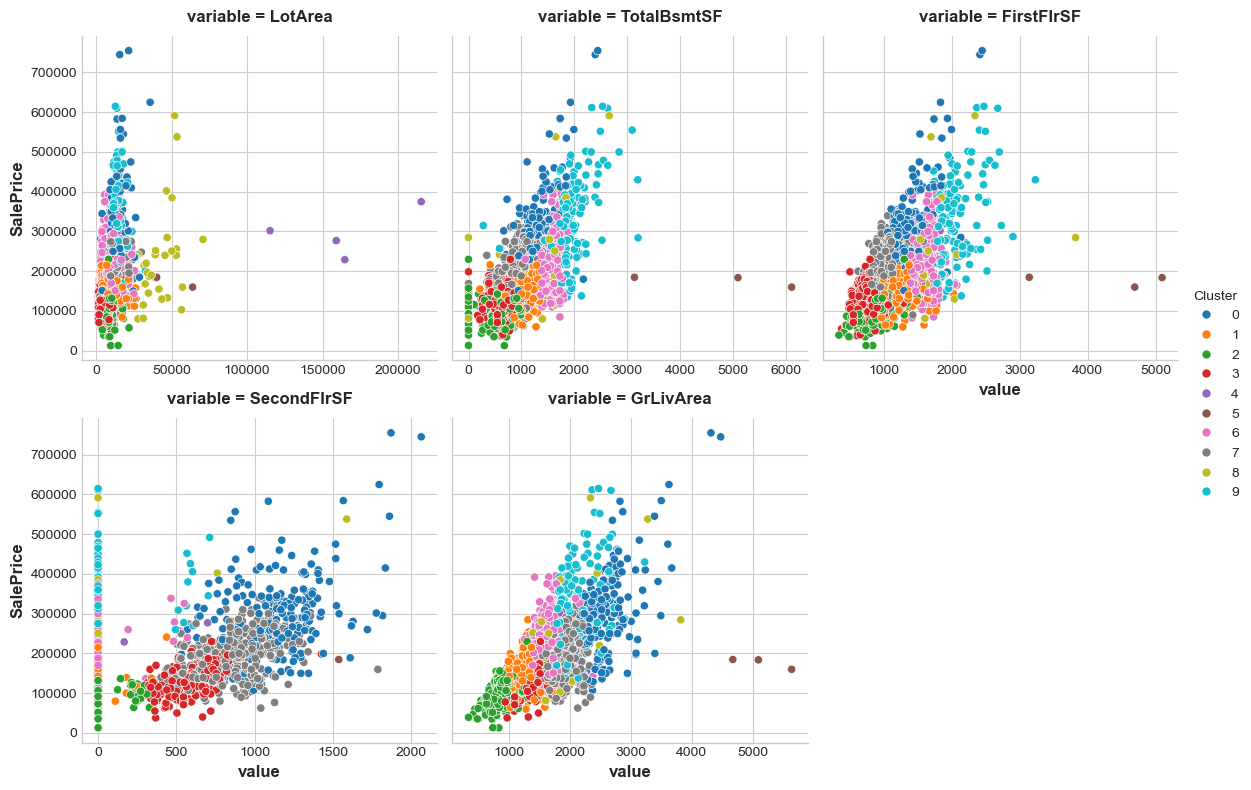

In [43]:
Xy = X.copy()
Xy["Cluster"] = Xy.Cluster.astype("category")
Xy["SalePrice"] = y
sns.relplot(
    x="value", y="SalePrice", hue="Cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=Xy.melt(
        value_vars=features, id_vars=["SalePrice", "Cluster"],
    ),
);
plt.show()

Et comme précédemment, la fonction *score_dataset* permet d'évaluer votre **modèle XGBoost** avec cette nouvelle caractéristique (la variable "Cluster") ajoutée aux données d'entraînement

In [47]:
score_dataset(X, y)

0.14278691728853624

L'algorithme k-means offre une alternative pour créer des caractéristiques. Au lieu de labelliser chaque point avec le centroïde de cluster le plus proche, il peut mesurer la distance d'un point à tous les centroïdes et retourner ces distances en tant que caractéristiques.

---

### Question 3 : Caractéristiques de distance au cluster
Ajoutez maintenant les caractéristiques de distance au cluster dans votre dataset. Vous pouvez obtenir ces caractéristiques de distance en utilisant la méthode **fit_transform** de kmeans au lieu de **fit_predict**.

In [51]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)

# Créez les caractéristiques de distance au cluster avec `fit_transform`
# Créer les caractéristiques de distance aux clusters
X_cd = kmeans.fit_transform(X_scaled[features])

# Étiqueter les caractéristiques et les joindre au dataset
X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])
X = X.join(X_cd)

X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Centroid_0,Centroid_1,Centroid_2,Centroid_3,Centroid_4,Centroid_5,Centroid_6,Centroid_7,Centroid_8,Centroid_9
0,0,0,141.0,31770.0,0,0,0,0,0,0,...,4.134181,3.236678,3.977023,4.316398,16.792665,13.097627,2.870851,3.789935,1.604330,3.315926
1,0,1,80.0,11622.0,0,0,1,0,0,1,...,4.615628,1.075352,0.621685,1.885029,19.594509,15.785445,2.575580,2.745164,4.932333,4.508933
2,0,0,81.0,14267.0,0,0,0,0,0,0,...,3.707220,0.953832,2.157567,2.713650,19.030448,14.058973,0.975653,2.618381,3.927018,2.780135
3,0,0,93.0,11160.0,0,0,1,0,0,0,...,3.874506,3.792481,5.085077,5.236814,19.392116,11.373003,2.243512,4.444882,4.673607,0.508460
4,1,0,74.0,13830.0,0,0,0,0,0,1,...,2.651716,2.070336,2.337714,1.306043,19.225117,14.749591,2.660527,0.733775,4.390193,4.103626


In [53]:
# Exécutez cette cellule pour évaluer ces nouvelles caractéristiques, si vous le souhaitez.
score_dataset(X, y)

0.13740473455384578